In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Introduction to Convolution neural network and Computer vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Inspect the data 



In [2]:
import os 
 # Walk through pizza_steak dir 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [3]:
# Get the classnames programmaticaly 

import pathlib 
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [4]:
# Let's visualize our images
import random
import matplotlib.image as mpimg
def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder=target_dir+target_class
    
    # Get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    
    # Read the image and plot
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    
    return img
    
    

['3890465.jpg']
Image shape: (512, 384, 3)


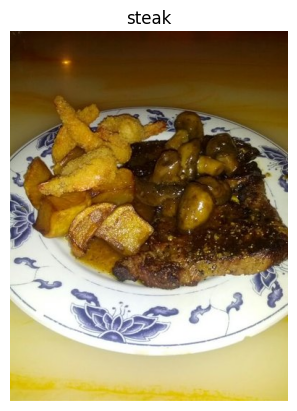

In [5]:
# view the random image from the training dataset

img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [6]:
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 35,  14,   0],
        [ 38,  17,   0],
        [ 42,  21,   2],
        ...,
        [ 42,   8,   0],
        [ 43,   9,   0],
        [ 43,   9,   0]],

       [[ 48,  27,   8],
        [ 38,  17,   0],
        [ 39,  18,   0],
        ...,
        [ 42,   8,   0],
        [ 43,   9,   0],
        [ 43,   9,   0]],

       [[ 50,  29,  10],
        [ 40,  19,   0],
        [ 38,  17,   0],
        ...,
        [ 42,   8,   0],
        [ 43,   9,   0],
        [ 43,   9,   0]],

       ...,

       [[213, 195,  69],
        [211, 193,  67],
        [211, 193,  67],
        ...,
        [213, 195,  83],
        [213, 196,  82],
        [213, 196,  82]],

       [[209, 191,  63],
        [208, 190,  62],
        [207, 189,  63],
        ...,
        [216, 196,  83],
        [216, 196,  83],
        [216, 196,  83]],

       [[218, 200,  72],
        [217, 199,  71],
        [216, 198,  72],
        ...,
        [222, 202,  8

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, mpore specifically we need a way to:

* load our images
* preprocess our images 
* build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training

### 1. preprocess images

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# Preprocess data (Normalization => Get all pixels values between 1 & 0)
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories 
train_dir="/tensorflow_coursse/pizza_steak/train/"
test_dir="/tensorflow_coursse/pizza_steak/test/"



# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir, 
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
test_data=valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### 2. Build + Compile + Fit (Model)

In [8]:
# Build a CNN model (same as tine VGG)
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")   
])

# Compile our model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 44s 743ms/step - loss: 0.5815 - accuracy: 0.6793 - val_loss: 0.3993 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 7s 156ms/step - loss: 0.4184 - accuracy: 0.8133 - val_loss: 0.3353 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 7s 152ms/step - loss: 0.3798 - accuracy: 0.8313 - val_loss: 0.3103 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 7s 150ms/step - loss: 0.3339 - accuracy: 0.8627 - val_loss: 0.2838 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 7s 152ms/step - loss: 0.3041 - accuracy: 0.8753 - val_loss: 0.3246 - val_accuracy: 0.8660


## try on non CNN model

In [10]:
tf.random.set_seed(42)

# Create a model 

model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
    
])



# Compile our model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history_1 = model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 172ms/step - loss: 3.5200 - accuracy: 0.6180 - val_loss: 1.0082 - val_accuracy: 0.6600
Epoch 2/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6924 - accuracy: 0.7407 - val_loss: 0.5537 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.8682 - accuracy: 0.6940 - val_loss: 1.4645 - val_accuracy: 0.5840
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.7007 - accuracy: 0.7253 - val_loss: 0.4535 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 7s 159ms/step - loss: 0.5276 - accuracy: 0.7760 - val_loss: 0.4438 - val_accuracy: 0.7820


In [11]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               19267712  
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,278,081
Trainable params: 19,278,081
Non-trainable params: 0
_________________________________________________________________


## Become one with the data

['3724677.jpg']
Image shape: (512, 512, 3)
['3663580.jpg']
Image shape: (512, 512, 3)


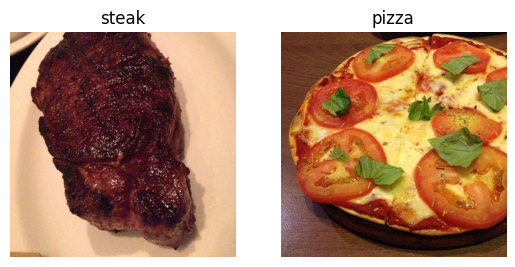

In [12]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### Preprocess data